<div class="markdown-google-sans">
  <h2>Project: Advanced Topics in Financial Modelling</h2>
</div>

This notebook is the final project's report for the **Advanced Topics in Financial Modelling** course taught by Professor Nicolas Gaussel at Paris 1 Panthéon Sorbonne University. 

This notebook was created and developed by Mai Thu Quynh.


In this notebook, I write and execute Python in my browser via Google Colaboratory.

<div class="markdown-google-sans">

## Brief of the problem context
</div>

You have just started working as a quantitative analyst in the client advisory department of a private bank. The team has previously collaborated with an American exchange-traded fund (ETF) provider named [Direxion](https://www.direxion.com/). The company asserts to provide suitable chances for strategic trades and exact investment exposure. To be more precise:

- In case of bear expectations, the team advises to invest into the Direxion Daily S&P 500® Bear (SPXS) 3X Shares which provides a 3 times
leveraged short exposure on the S&P 500.

- In case of bull expectations, aside the traditional 3) 'spider' SPDR S&P 500 ETF (SPY) which provides delta 1 exposure to the S&P 500 at a cheap
price, the team advised 4) the Direxion Daily S&P 500® Bull (SPXL) 3X
Shares which provides a 3 times leveraged long exposure on the S&P 500.

However, the team stopped advising those products because they did not behave as expected and even raised some suspicion among certain clients. A new head of advisory has been appointed and asks to you review the performances of those ETFs and clarify certain points:


1. What should be told to clients to better manage their expectations?

2. Should the team keep them on the advisory list?

You are asked to write a comprehensive memo on the matter which will be
presented to the Executive Committee, beginning of April. Your firm finds
Bloomberg too expensive and asks you to get data from the (free) Yahoo API.



<div class="markdown-google-sans">

##  1. Descriptive data analysis
</div>

In this section, we shall retrieve the data from Yahoo Finance API since January 1st, 2017 and focus on the close price.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# set the ticker symbol and start date
symbol = "SPXS"
start_date = "2017-01-01"

# retrieve the data from Yahoo Finance
data = yf.download(symbol, start=start_date)

# extract the adjusted closing price
prices = data['Adj Close']

# compute the daily log-returns
log_returns = np.log(prices/prices.shift(1)).dropna()

# compute the mean log-return and volatility
mean_return = log_returns.mean()
volatility = log_returns.std()

# compute the skewness and kurtosis
skewness = skew(log_returns)
kurt = kurtosis(log_returns)

# print the results
print('Mean Log-Return:', mean_return)
print('Volatility:', volatility)
print('Skewness:', skewness)
print('Kurtosis:', kurt)

[*********************100%***********************]  1 of 1 completed
Mean Log-Return: -0.0021314389626709684
Volatility: 0.03737129374177931
Skewness: -0.2939536600738255
Kurtosis: 13.25053194050555


[*********************100%***********************]  3 of 3 completed


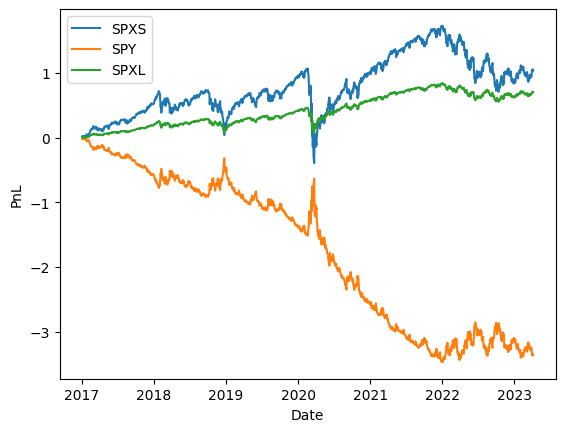

Sharpe Ratios:
SPXS : 28.718705464487915
SPY : -23.87126010648495
SPXL : 27.343565945907354


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set the ticker symbols and start date
symbols = ["SPXS", "SPY", "SPXL"]
start_date = "2017-01-01"

# retrieve the data from Yahoo Finance
data = yf.download(symbols, start=start_date)

# extract the adjusted closing prices
prices = data['Adj Close']

# compute the daily log-returns
log_returns = np.log(prices/prices.shift(1)).dropna()

# compute the PnL trajectories
pnl_trajectories = np.cumsum(log_returns, axis=0)

# compute the Sharpe ratios
sharpe_ratios = np.sqrt(252) * pnl_trajectories.mean() / pnl_trajectories.std()

# plot the PnL trajectories
plt.plot(pnl_trajectories)
plt.legend(symbols)
plt.xlabel('Date')
plt.ylabel('PnL')
plt.show()

# print the Sharpe ratios
print('Sharpe Ratios:')
for symbol, sharpe_ratio in zip(symbols, sharpe_ratios):
    print(symbol, ':', sharpe_ratio)

[*********************100%***********************]  1 of 1 completed


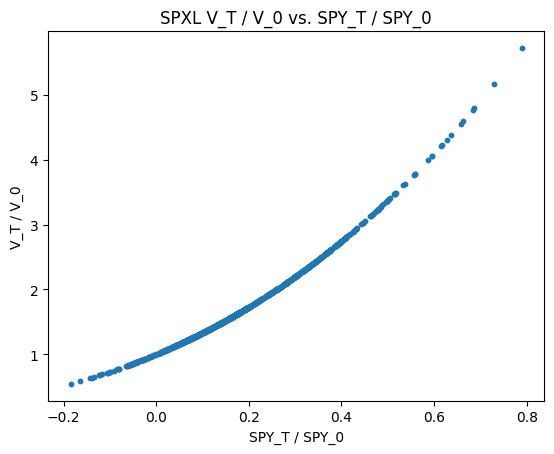

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Retrieve daily price data of SPY from Yahoo Finance
symbol = 'SPY'
start_date = '2017-01-01'
end_date = '2022-03-28'
spy = yf.download(symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily log returns of SPY
log_returns = np.log(spy / spy.shift(1))
log_returns.dropna(inplace=True)

# Calculate rolling one-year returns of SPY and SPXL
rolling_returns = log_returns.rolling(window=252).sum().dropna()
spy_rolling = spy.iloc[251:] / spy.iloc[:-251].values - 1
spxl_rolling = (spy_rolling + 1) ** 3

# Calculate V_T/V_0 for SPXL with constant exposure of 3
l = 3
sigma_squared = np.var(log_returns)
t = 1
vt_v0 = spxl_rolling * np.exp(-0.5 * (l**2 - l) * sigma_squared * t)

# Plot V_T/V_0 as a function of SPY_T/SPY_0
plt.scatter(spy_rolling, vt_v0, s=10)
plt.xlabel('SPY_T / SPY_0')
plt.ylabel('V_T / V_0')
plt.title('SPXL V_T / V_0 vs. SPY_T / SPY_0')
plt.show()

[*********************100%***********************]  1 of 1 completed


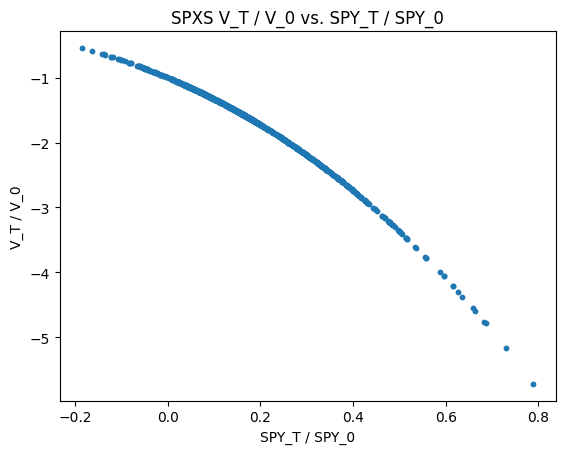

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Retrieve daily price data of SPY from Yahoo Finance
symbol = 'SPY'
start_date = '2017-01-01'
end_date = '2022-03-28'
spy = yf.download(symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily log returns of SPY
log_returns = np.log(spy / spy.shift(1))
log_returns.dropna(inplace=True)

# Calculate rolling one-year returns of SPY and SPXS
rolling_returns = log_returns.rolling(window=252).sum().dropna()
spy_rolling = spy.iloc[251:] / spy.iloc[:-251].values - 1
spxs_rolling = -1 * (spy_rolling + 1) ** 3

# Calculate V_T/V_0 for SPXS with constant exposure of -3
l = -3
sigma_squared = np.var(log_returns)
t = 1
vt_v0 = spxs_rolling * np.exp(-0.5 * (l**2 - l) * sigma_squared * t)

# Plot V_T/V_0 as a function of SPY_T/SPY_0
plt.scatter(spy_rolling, vt_v0, s=10)
plt.xlabel('SPY_T / SPY_0')
plt.ylabel('V_T / V_0')
plt.title('SPXS V_T / V_0 vs. SPY_T / SPY_0')
plt.show()

[*********************100%***********************]  1 of 1 completed


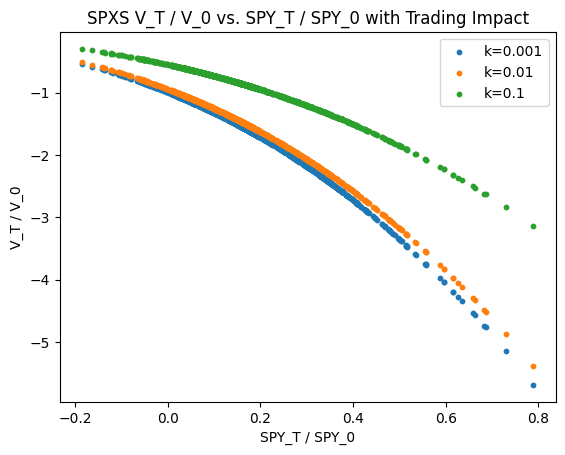

In [ ]:
import yfinance as yf
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Retrieve daily price data of SPY from Yahoo Finance
symbol = 'SPY'
start_date = '2017-01-01'
end_date = '2022-03-28'
spy = yf.download(symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily log returns of SPY
log_returns = np.log(spy / spy.shift(1))
log_returns.dropna(inplace=True)

# Calculate rolling one-year returns of SPY and SPXS
rolling_returns = log_returns.rolling(window=252).sum().dropna()
spy_rolling = spy.iloc[251:] / spy.iloc[:-251].values - 1
spxs_rolling = -1 * (spy_rolling + 1) ** 3

# Calculate V_T/V_0 for SPXS with constant exposure of -3 and impact cost
l = -3
sigma_squared = np.var(log_returns)
t = 1
ks = [0.001, 0.01, 0.1]  # impact cost parameter values
vt_v0_list = []
for k in ks:
    integrand = lambda s: (sigma_squared * s + k)
    integral, _ = quad(integrand, 0, t)
    vt_v0 = spxs_rolling * np.exp(-0.5 * (l**2 - l) * integral)
    vt_v0_list.append(vt_v0)

# Plot V_T/V_0 as a function of SPY_T/SPY_0 for different values of k
plt.scatter(spy_rolling, vt_v0_list[0], s=10, label='k=0.001')
plt.scatter(spy_rolling, vt_v0_list[1], s=10, label='k=0.01')
plt.scatter(spy_rolling, vt_v0_list[2], s=10, label='k=0.1')
plt.xlabel('SPY_T / SPY_0')
plt.ylabel('V_T / V_0')
plt.title('SPXS V_T / V_0 vs. SPY_T / SPY_0 with Trading Impact')
plt.legend()
plt.show()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,529.500000,537.500000,523.500000,527.500000,510.920898,85766
2017-01-04,525.000000,525.500000,517.000000,519.000000,502.687958,65052
2017-01-05,521.000000,526.000000,518.500000,519.500000,503.172333,48962
2017-01-06,518.500000,523.000000,510.500000,514.000000,497.845123,80222
2017-01-09,516.500000,520.000000,515.000000,518.500000,502.203674,43578
...,...,...,...,...,...,...
2023-03-31,18.370001,18.389999,17.690001,17.709999,17.709999,25046700
2023-04-03,17.799999,17.860001,17.469999,17.540001,17.540001,20056500
2023-04-04,17.450001,18.010000,17.410000,17.820000,17.820000,28290800


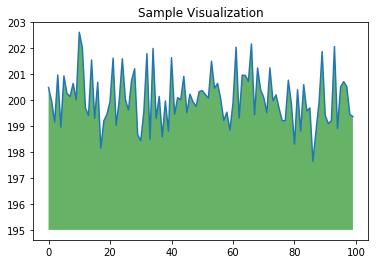

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
